In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv('E_Commerce copy.csv')

In [6]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# Drop irrelevant columns
df.drop(['ID'], axis=1, inplace=True)

In [5]:
# Handle missing values (if any)
df.fillna(df.mode().iloc[0], inplace=True)

In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)


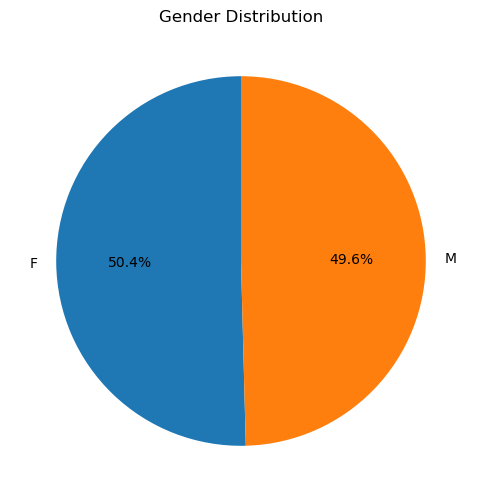

In [7]:
# Enhanced EDA
plt.figure(figsize=(6,6))
plt.pie(df['Gender'].value_counts(), labels=['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

Text(0.5, 1.0, 'Cost of the Product')

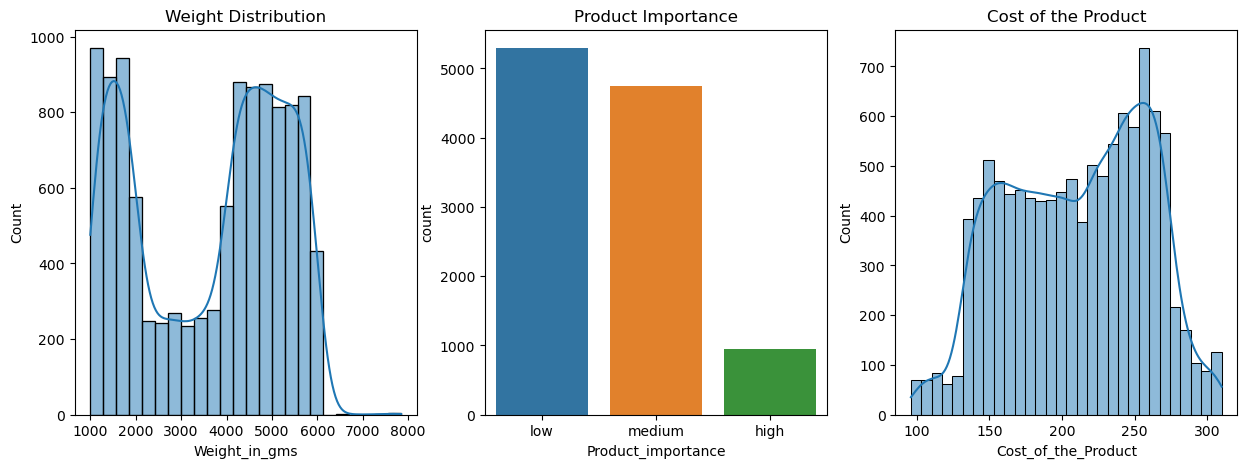

In [8]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

Text(0.5, 1.0, 'Reached on Time')

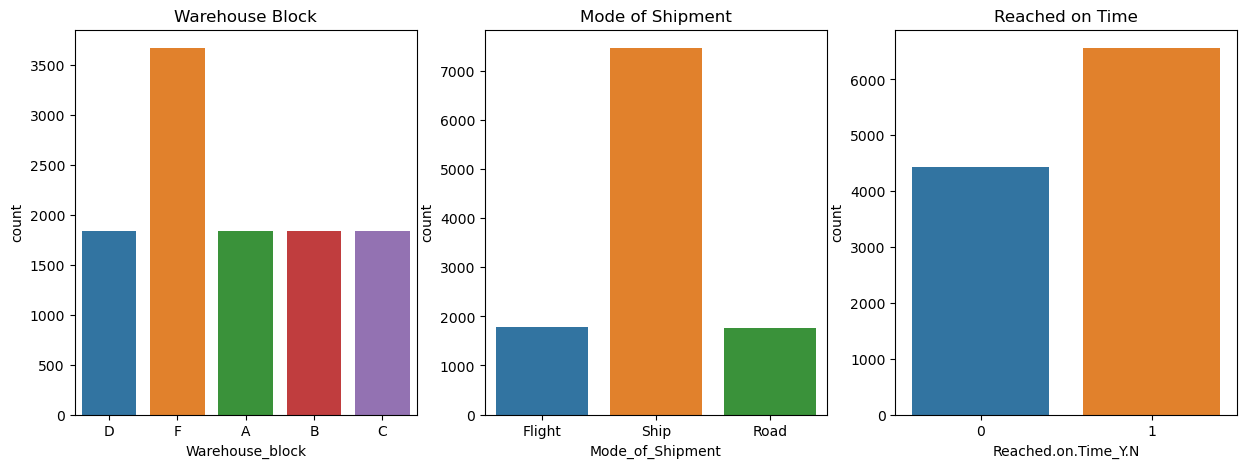

In [9]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('Reached on Time')

Text(0.5, 1.0, 'Discount Offered')

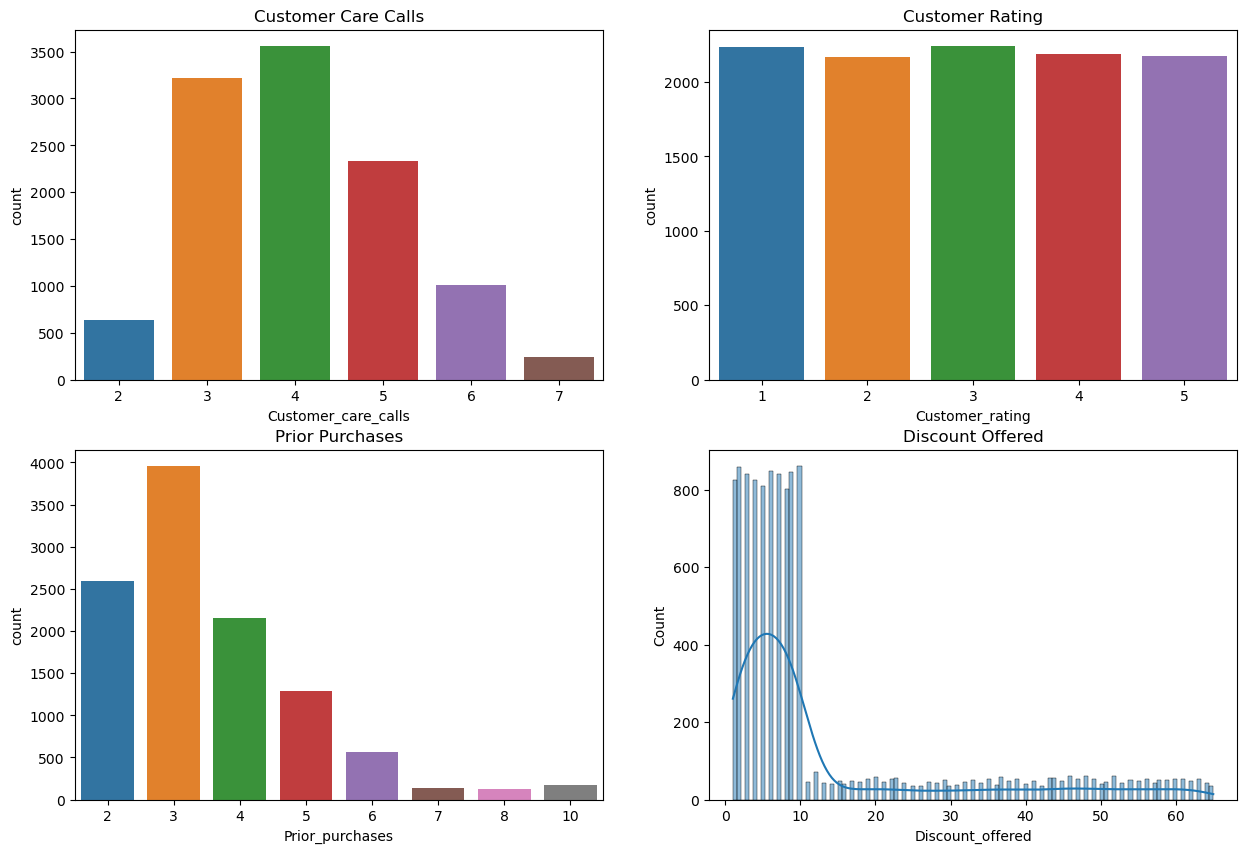

In [10]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

Text(0.5, 1.0, 'Gender vs Reached on Time')

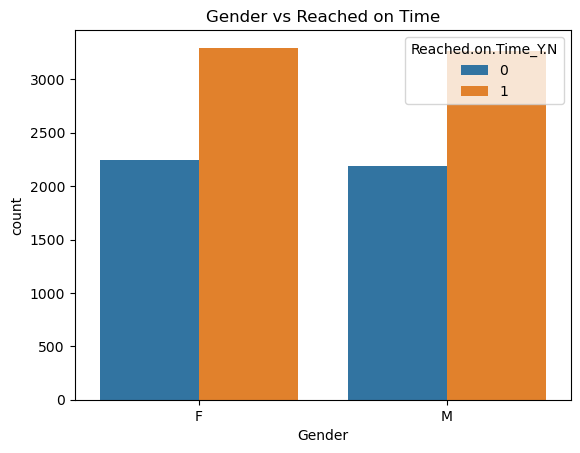

In [11]:
sns.countplot(x = 'Gender', data = df, hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')

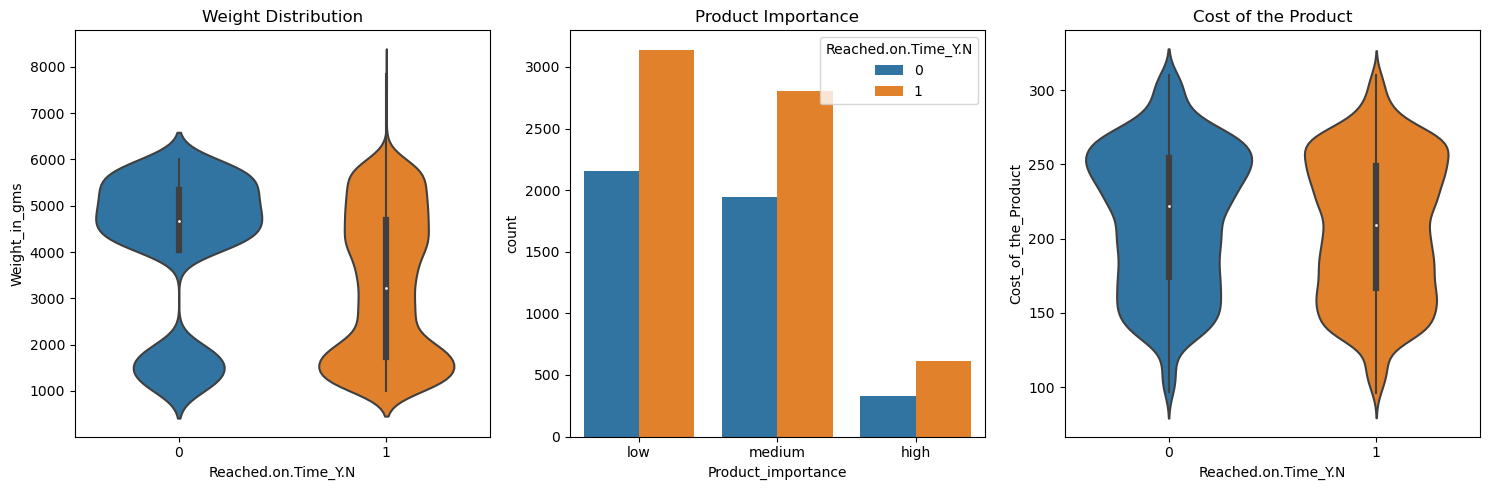

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(y='Weight_in_gms', x='Reached.on.Time_Y.N', data=df, ax=ax[0]).set_title('Weight Distribution')
sns.countplot(x='Product_importance', data=df, ax=ax[1], hue='Reached.on.Time_Y.N').set_title('Product Importance')
sns.violinplot(y='Cost_of_the_Product', x='Reached.on.Time_Y.N', data=df, ax=ax[2]).set_title('Cost of the Product')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Mode of Shipment')

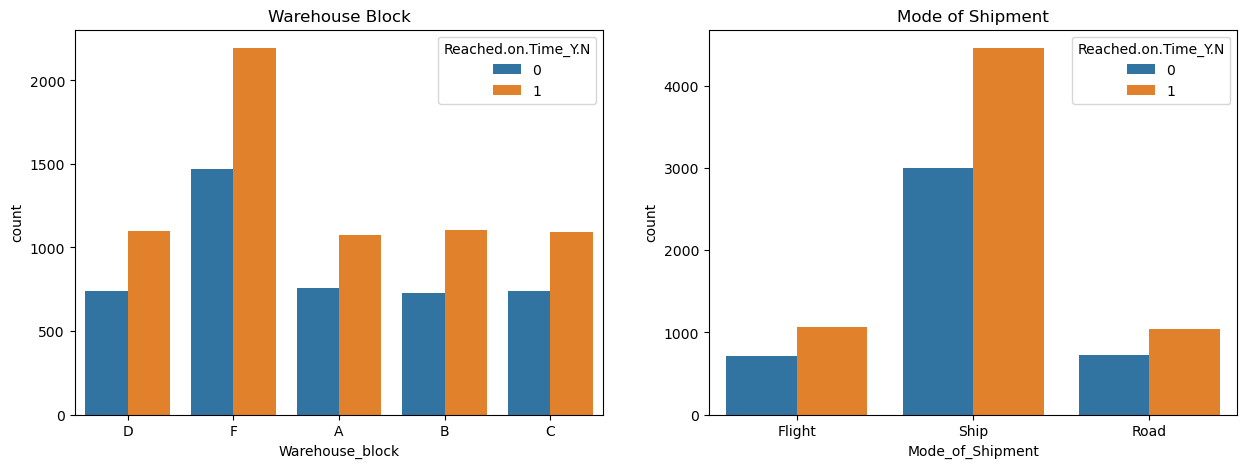

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

Text(0.5, 1.0, 'Discount Offered')

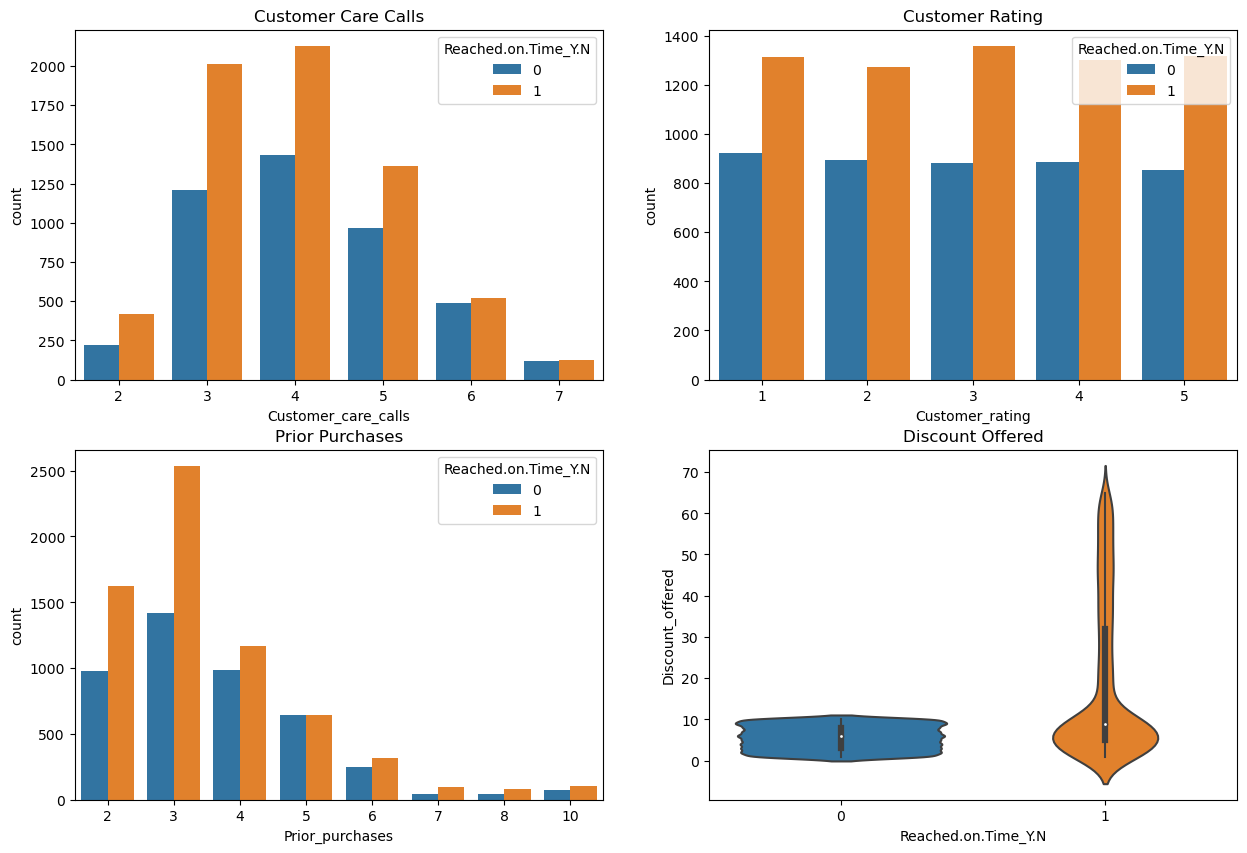

In [14]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')

In [15]:
# Feature Engineering: Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']:
    df[col] = le.fit_transform(df[col])

In [16]:

# Feature Engineering: Interaction Features
df['Cost_per_gram'] = df['Cost_of_the_Product'] / (df['Weight_in_gms'] + 1)
df['Discount_ratio'] = df['Discount_offered'] / (df['Cost_of_the_Product'] + 1)

In [17]:

# Prepare data for modeling
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

In [18]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [19]:
# Pipeline: Preprocessing + Model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [20]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [8, 12, 16],
    'clf__min_samples_leaf': [2, 4, 8],
    'clf__min_samples_split': [2, 4, 8]
}
grid = GridSearchCV(
    pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2
)
grid.fit(X_train, y_train)

print('Best parameters:', grid.best_params_)
print('Train accuracy:', grid.score(X_train, y_train))
print('Test accuracy:', grid.score(X_test, y_test))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END clf__max_depth=8, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100; total time=   1.5s
[CV] END clf__max_depth=8, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100; total time=   1.6s
[CV] END clf__max_depth=8, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100; total time=   1.6s
[CV] END clf__max_depth=8, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100; total time=   1.7s
[CV] END clf__max_depth=8, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100; total time=   1.7s
[CV] END clf__max_depth=8, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200; total time=   2.6s
[CV] END clf__max_depth=8, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200; total time=   2.8s
[CV] END clf__max_depth=8, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=20

              precision    recall  f1-score   support

           0       0.56      0.98      0.71       887
           1       0.98      0.48      0.64      1313

    accuracy                           0.68      2200
   macro avg       0.77      0.73      0.68      2200
weighted avg       0.81      0.68      0.67      2200



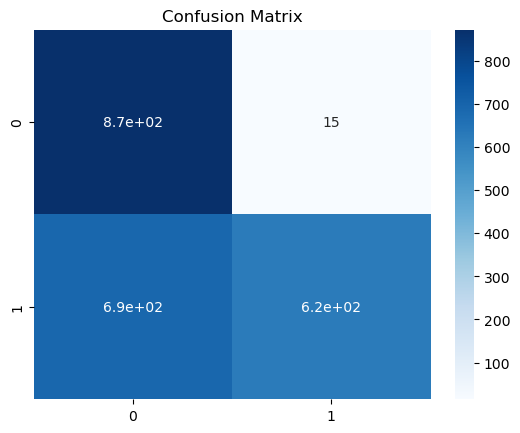

In [21]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Save the entire pipeline
import joblib
joblib.dump(grid.best_estimator_, 'ecommerce_delivery_pipeline.pkl')

['ecommerce_delivery_pipeline.pkl']